In [1]:
"""Modulo borrachos."""
import random


class Borracho:
    """Clase para los borrachos."""

    def __init__(self, nombre):
        """Inicializa el borracho."""
        self.nombre = nombre


class BorrachoTradicional(Borracho):
    """Clase para el borracho tradicional."""

    def __init__(self, nombre):
        """Inicializa el borracho tradicional."""
        super().__init__(nombre)

    def camina(self):
        """Retorna una tupla.

        Calcula el valor aleatorio con la direccion
        a donde se mueve el borracho si solo tomo alcohol.
        """
        # return random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
    
        '''Si queremos ver el comportamiento de nuestro borracho, si ademas estuviera drogado, comentamos arriba
        y usamos el codigo de abajo'''
        
        return (random.choice([(random.random(), random.random() * -1),
                               (random.random() * -1, random.random()),
                               (random.random() * -1, random.random() * -1),
                               (random.random(), random.random()),]))

In [2]:
"""Modulo de coordenadas."""


class Coordenada:
    """Clase para las coordenadas.
       Esta clase equivale a un puntero en el eje de coordenadas cartesiano (x, y)
    """

    def __init__(self, x, y):
        """Inicializa las coordenadas."""
        self.x = x
        self.y = y

    def mover(self, delta_x, delta_y):
        """Retorna una nueva Coordenada con la nueva posicion.
           Mueve nuestro puntero de posicion.
        """
        return Coordenada(self.x + delta_x, self.y + delta_y)

    def distancia(self, otra_coordenada):
        """Calcula la distancia entre las coordenada usando teorema de pitagoras."""
        delta_x = self.x - otra_coordenada.x
        delta_y = self.y - otra_coordenada.y
        return (delta_x**2 + delta_y**2)**0.5

In [3]:
"""Modulo del Campo para Borracho."""

class Campo:
    """Clase para el campo donde se mueve le borracho."""
    
    def __init__(self):
        """Inicializa el campo y creamos un diccionario."""
        self.coordenadas_de_borrachos = {}
            
    def anadir_borracho(self, borracho, coordenada):
        """Agrega un borracho al diccionario."""
        self.coordenadas_de_borrachos[borracho] = coordenada
        '''le damos una llave(borracho) y un valor(coordenada)'''
    
    def mover_borracho(self, borracho):
        """Mueve al borracho de coordenda."""
        delta_x, delta_y = borracho.camina()
        '''lo que hacemos es: generar el movimiento aleatorio con "borracho.camina()"
        y guardar el movimiento en las variables dif_X , dif_Y'''
        coordenada_actual = self.coordenadas_de_borrachos[borracho]
        '''creamos la varible coordenada_actual y le asignamos las coordenadas del borracho'''
        nueva_coordenada = coordenada_actual.mover(delta_x, delta_y)
        '''creamos una nueva_coordenada y le asignamos coordenada_actual.mover(dif_x, dif_y)
        lo que hace "coordenada_actual.mover(dif_x, dif_y)":
        es aplicar el movimiento aleatorio generado anteriormente por "borracho.camina()'''
        self.coordenadas_de_borrachos[borracho] = nueva_coordenada

    def obtener_coordenada(self, borracho):
        """Retorna la coordenada del borracho."""
        return self.coordenadas_de_borrachos[borracho]
    

In [10]:
"""
Funciones para graficar datos.
"""

import plotly.express as px

def graficar_medias(x, y, nombre_grafica): # opcion 1
    fig = px.line(x=x, 
                  y=y, 
                  color_discrete_sequence=['#FA0087'])
    
    fig.update_traces(textposition="bottom right")
    
    fig.update_layout(title=f'Camino aleatorio - Distancia {nombre_grafica} del borracho',
                      font=dict(family='verdana', size=16, color='white'),
                      template='plotly_dark',
                      height=500,
                      width=900, 
                      xaxis_title="pasos", 
                      yaxis_title="distancia al punto de origen",
                      legend_bgcolor='rgb(117, 112, 179)')
    
    fig.show()


def graficar_caminata(camino, pasos: int): # Opcion 2

    list_x = []
    list_y = []
    
    for desplazamiento in camino:
        list_x.append(desplazamiento.x)
        list_y.append(desplazamiento.y)
        
    fig = px.line(x=list_x, 
                  y=list_y, 
                  color_discrete_sequence=['#FA0087'])
    
    fig.update_traces(textposition="bottom right")
    
    fig.update_layout(title='Camino aleatorio con %d pasos, partiendo del punto de origen.',
                      font=dict(family='verdana', size=16, color='white'),
                      template='plotly_dark',
                      height=500,
                      width=900, 
                      xaxis_title="Eje x", 
                      yaxis_title="Eje y")
    
    fig.show()


********************************************************************************************
* Seleccione una de las siguientes opciones:                                               *
*                                                                                          *
* 0: Obtener los datos Min, Max y Media para un camino aleatorio de N pasos en M intentos. *
* 1: Gráfica de Medias para una lista de caminatas con N1...Nn pasos c/u en M intentos.    *
* 2: Gráfica de la camina realiza para un caso de N pasos.                                 *
* exit: Finalizar la ejecución del programa                                                *
*                                                                                          *
* las cantidades de pasos se solicitarán a continuación.                                   *
********************************************************************************************
 1
numeros de pasos, separados por un espacio:  10 20 50 100 200 500 

[10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]


Cantidades de intentos:  100


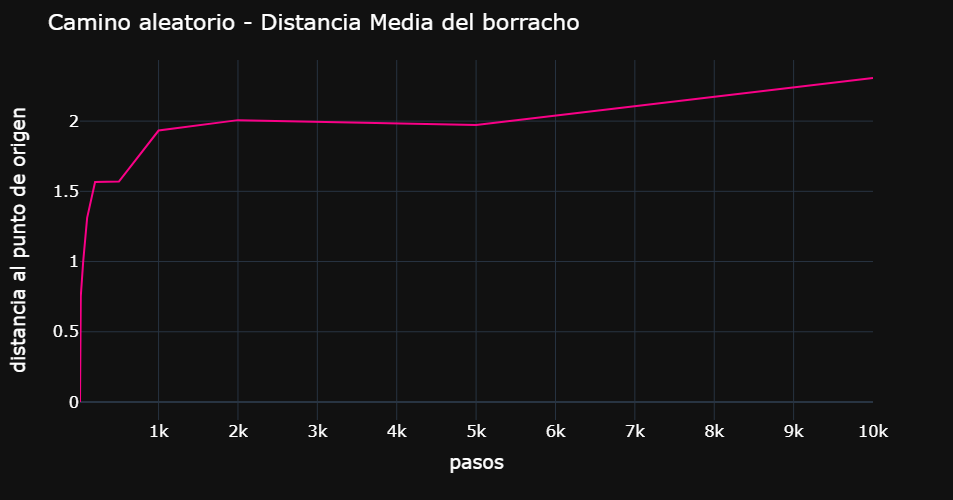

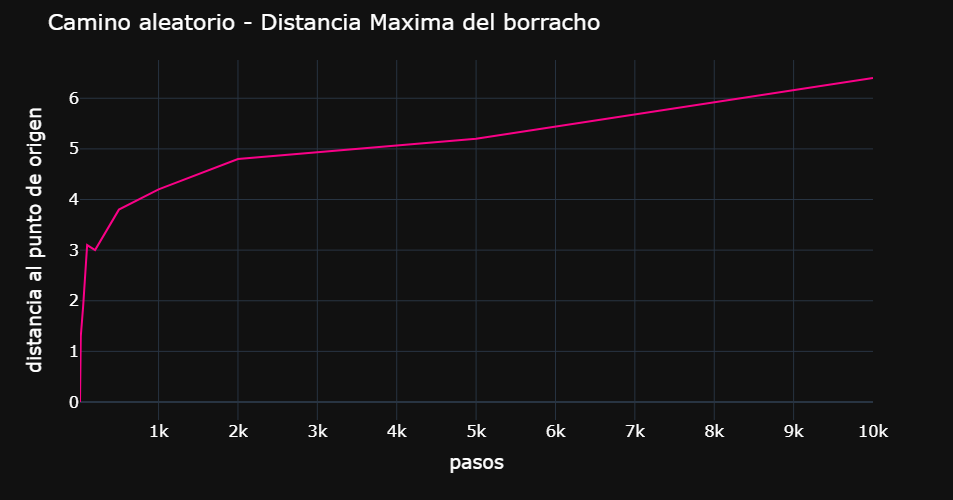

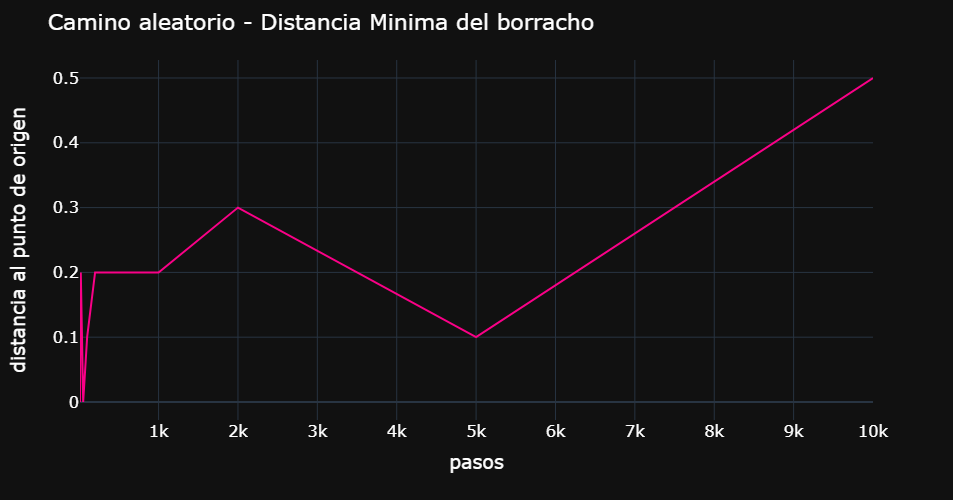

In [ ]:
"""Modulo principal."""

import sys


def caminata(campo, borracho, pasos):
    """Funcion auxiliar para la simulacion de la caminata."""
    inicio = campo.obtener_coordenada(borracho)

    for _ in range(pasos):
        campo.mover_borracho(borracho)

    return inicio.distancia(campo.obtener_coordenada(borracho))


def simular_caminata(pasos, numero_de_intentos):
    """Simula la caminata."""
    borracho = BorrachoTradicional(nombre='Luis')
    origen = Coordenada(0, 0)
    distancias = []

    for _ in range(numero_de_intentos):
        campo = Campo()
        campo.anadir_borracho(borracho, origen)
        simulacion_caminata = caminata(campo, borracho, pasos)
        distancias.append(round(simulacion_caminata, 1))

    return distancias


def obtener_camino_recorrido(pasos):
    """
    Crea y obtiene el camino recorrido por un borracho.
    """
    borracho = BorrachoTradicional(nombre='Luis')
    origen = Coordenada(0, 0)

    campo = Campo()
    campo.anadir_borracho(borracho, origen)

    camino_recorrido = [campo.obtener_coordenada(borracho)]

    for _ in range(pasos):
        campo.mover_borracho(borracho)
        camino_recorrido.append(campo.obtener_coordenada(borracho))

    return camino_recorrido


def main():
    
    """Funcion principal."""
    opciones_validas = ['0', '1', '2', 'exit']

    menu = ('\n********************************************************************************************\n'
            '* Seleccione una de las siguientes opciones:                                               *\n'
            '*                                                                                          *\n'
            '* 0: Obtener los datos Min, Max y Media para un camino aleatorio de N pasos en M intentos. *\n'
            '* 1: Gráfica de Medias para una lista de caminatas con N1...Nn pasos c/u en M intentos.    *\n'
            '* 2: Gráfica de la camina realiza para un caso de N pasos.                                 *\n'
            '* exit: Finalizar la ejecución del programa                                                *\n'
            '*                                                                                          *\n'
            '* las cantidades de pasos se solicitarán a continuación.                                   *\n'
            '********************************************************************************************\n')

    opcion = input(menu)

    while opcion not in opciones_validas:
        opcion = input('Opcion inválida, por favor reintentar.\n')

    if opcion == 'exit':
        print('Nos vemos!')
        sys.exit(0)

    elif opcion == '2':
        pasos = int(input('Cantidades de pasos:'))
        camino_recorrido = obtener_camino_recorrido(pasos)

        graficar_caminata(camino_recorrido, pasos)
        print('\n')

        
    elif opcion == '0' or opcion == '1':
        distancias_de_caminata = [int(x) for x in input('numeros de pasos, separados por un espacio: ').split()]
        print(distancias_de_caminata)
        numero_de_intentos = int(input('Cantidades de intentos: '))

        distancia_media_por_caminata = []
        distancia_maxima_por_caminata = []
        distancia_minima_por_caminata = []

        for pasos in range(0, len(distancias_de_caminata)):
            distancias = simular_caminata(pasos, numero_de_intentos)

            distancia_media = round(sum(distancias) / len(distancias), 4)
            distancia_maxima = max(distancias)
            distancia_minima = min(distancias)
            
            distancia_media_por_caminata.append(distancia_media)
            distancia_maxima_por_caminata.append(distancia_maxima)
            distancia_minima_por_caminata.append(distancia_minima)
            
        if opcion == '0':
            print('caminata aleatoria de %s pasos\n'
                  'Distancia Media recorrida = %s\n'
                  'Distancia Maxima recorrida = %s\n'
                  'Distancia Minima recorrida = %s\n'
                   % (pasos, distancia_media, distancia_maxima, distancia_minima))
                
        elif opcion == '1':
            graficar_medias(distancias_de_caminata, distancia_media_por_caminata, 'Media')
            print('\n')
            graficar_medias(distancias_de_caminata, distancia_maxima_por_caminata, 'Maxima')
            print('\n')
            graficar_medias(distancias_de_caminata, distancia_minima_por_caminata, 'Minima')
            print('\n')
            
if __name__ == '__main__':
    while 1:
        main()